<a href="https://colab.research.google.com/github/ferareosa/ABP-Innovacion-ISPC-2025/blob/main/ABP_Innovaci%C3%B3n_de_Datos_TSCDIA_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proceso ETL con Pandas  
## Exploración, Transformación y Limpieza de Datos

---

### Instituto: ISPC – Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial  
### Materia: Ciencia de Datos  
### Alumnos: Fernando Areosa y Luis Lagger
### Cohorte: 2025

---

## Índice

1. [Introducción y Objetivos](#scrollTo=QU7P7YpUIvtn)  
2. [Extracción de Datos (Extract)](#scrollTo=e1f3e46c)  
3. [Transformación de Datos (Transform)](#scrollTo=4c0c1927)  
4. [Limpieza y Carga de Datos (Load)](#scrollTo=b58e3f3d)  
5. [Carga a Base de Datos y Consultas SQL](#scrollTo=9c862b90)  
6. [Análisis Exploratorio de Datos](#scrollTo=1b57aaf9)  
7. [Conclusiones](#scrollTo=395ede36)  
8. [Referencias](#scrollTo=yHIQUTl3J0Zn)

---


##  Introducción y Objetivos

El presente trabajo práctico tiene como objetivo permitir a los estudiantes adquirir experiencia en el proceso **ETL (Extracción, Transformación y Limpieza)** de datos al trabajar con un dataset que combina información de ventas y datos de clientes.

Se trabajará con los archivos `customer_data.csv` y `sales_data.csv` obtenidos desde Kaggle. Y luego subidos a un repositorio GitHub.  
Durante el desarrollo se abordarán las siguientes etapas:

- Extracción de datos desde archivos CSV.
- Transformación, limpieza y estandarización de formatos.
- Creación de un DataFrame limpio y listo para análisis.
- Carga de los datos en una base de datos relacional.
- Realización de consultas SQL básicas.
- Análisis exploratorio de datos para extraer información relevante.

----

## Extracción de Datos (Extract)

En esta primera etapa se realiza la **carga y exploración inicial** de los datos provenientes de los archivos:

- `customer_data.csv`

- `sales_data.csv`

---

### 🪄 1. Cargar los datos desde archivos CSV

A continuación, se realiza la importación de librerías necesarias y la carga de los archivos CSV a DataFrames de Pandas.

In [ ]:

import pandas as pd
import numpy as np

# Cargar archivos CSV
df_customers = pd.read_csv('https://raw.githubusercontent.com/ferareosa/SalesAndCustomerData/refs/heads/main/customer_data.csv')
df_sales = pd.read_csv('https://raw.githubusercontent.com/ferareosa/SalesAndCustomerData/refs/heads/main/sales_data.csv')


 #### 1.1.  Se muestran los datos y analisis de los dataframes

In [ ]:
print("Datos de Clientes:")
display(df_customers.head())
display(df_customers.info())
display(df_customers['age'].describe())

Datos de Clientes:


,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


None

,age
count,99338.000000
mean,43.425859
std,14.989400
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


In [ ]:
print("Datos de Ventas:")
display(df_sales.head())
display(df_sales.info())
display(df_sales['price'].describe())

Datos de Ventas:


,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


None

,price
count,99457.000000
mean,689.256321
std,941.184567
min,5.230000
25%,45.450000
50%,203.300000
75%,1200.320000
max,5250.000000


### 📝 2. Descripción del proceso de extracción

- Se utilizaron las funciones `pd.read_csv()` para leer los archivos CSV.  
- Cada archivo fue cargado en un DataFrame independiente:
  - `df_customers` → almacena la información de clientes.
  - `df_sales` → almacena la información de ventas.
- La función `head()` permitió una primera exploración de las estructuras de ambos DataFrames para verificar que los datos se hayan cargado correctamente.
- La función `info()` nos describe la cantidad de campos no nulos en cada columna.
- La función `describe()` nos muestra estadisticas basicas sobre las columnas `df_sales['price']` y `df_customers['age']`
- Este paso es fundamental para identificar una estrategia para analizar el manejo de valores nulos, un analisis etario basico.

---

### 3. Concatenación de DataFrames

Antes de realizar cualquier transformación, se procede a concatenar o unir los DataFrames.  

> **Nota:**
Se conservarán los DataFrames originales (`df_customers` y `df_sales`) para mantener la trazabilidad de la información.

In [ ]:
df_merged = pd.merge(df_customers, df_sales, on='customer_id', how='inner')
display(df_merged.head())
display(df_merged.info())

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05-08-2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09-11-2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24-10-2021,Kanyon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


None


## Transformación de Datos (Transform)

En esta etapa se busca **preparar y limpiar la información** de los DataFrames originales para que pueda ser utilizada en análisis y consultas posteriores.

Las acciones principales incluyen:

- Estandarizacion de valores nulos: Al ser unicamnete en la columna `age` y presentar menos del 0.12% del total de los casos se decide eliminarlos.
- Estandarización de formatos de fecha: se opta por formato dd/mm/aaaa.
- Categorización y análisis inicial de métodos de pago y comportamiento por género y edad.

In [ ]:
# Verificar valores nulos y estandarizar fechas
df_merged.dropna(subset=['age'], inplace=True)
df_merged['invoice_date'] = pd.to_datetime(df_merged['invoice_date'], format='%d-%m-%Y', errors='coerce')
df_merged['invoice_date'] = df_merged['invoice_date'].dt.strftime('%d/%m/%Y')
display(df_merged.head())

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05/08/2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12/12/2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09/11/2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16/05/2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24/10/2021,Kanyon


### Categorizaciones y Análisis Inicial


* Métodos de pagos realizados por el rango etario de 25 a 35 años

* Métodos de pago más utilizados por las mujeres.

* Precios por categoría de productos

In [ ]:
# Métodos de pago más frecuentes
metodo_pago_frecuente = df_merged[(df_merged['age'] >= 25) & (df_merged['age'] <= 35)]['payment_method'].mode()[0]
metodo_por_genero = df_merged.groupby('gender')['payment_method'].agg(lambda x: x.mode()[0])

# Rangos etarios basados en cuartiles (Q1, Q2, Q3, Q4)
bins = [18, 30, 43, 56, 70]
labels = ['Q1 (18-29)', 'Q2 (30-42)', 'Q3 (43-55)', 'Q4 (56-69)']
df_merged['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=False, include_lowest=True)
metodo_por_rango_etario = df_merged.groupby('age_group', observed=False)['payment_method'].value_counts().unstack()

precios_categoria = df_merged.groupby('category', observed=False)['price'].agg(['mean','min','max'])

print("Método de pago más frecuente entre los 25 y 35:", metodo_pago_frecuente)
display(metodo_por_genero)
display(precios_categoria)
display(metodo_por_rango_etario)

Método de pago más frecuente entre los 25 y 35: Cash


,payment_method
gender,
Female,Cash
Male,Cash


,mean,min,max
category,,,
Books,45.562651,15.15,75.75
Clothing,901.119898,300.08,1500.40
Cosmetics,122.451725,40.66,203.30
Food & Beverage,15.671930,5.23,26.15
Shoes,1807.281763,600.17,3000.85
Souvenir,34.884470,11.73,58.65
Technology,3157.147147,1050.00,5250.00
Toys,107.754876,35.84,179.20


payment_method,Cash,Credit Card,Debit Card
age_group,,,
Q1 (18-29),10316,8047,4654
Q2 (30-42),11155,8796,5048
Q3 (43-55),10996,8746,5031
Q4 (56-69),11930,9309,5310



## Limpieza y Carga de Datos (Load)
En esta etapa se consolida toda la información procesada y transformada en un **único DataFrame limpio y listo para análisis** o para su carga en una base de datos relacional.

También se documentan las restricciones aplicadas y las consideraciones de integridad de datos.

In [ ]:
columnas_finales = ['customer_id','gender','age','payment_method',
                    'invoice_no','category','quantity','price','invoice_date', 'shopping_mall', 'age_group']
df_clean = df_merged[columnas_finales].copy()
display(df_clean.head())
print("Cantidad de registros finales:", len(df_clean))

# Save the cleaned DataFrame to a CSV file
df_clean.to_csv('cleaned_sales_data.csv', index=False)
print("Datos limpios guardados en 'Archivos/cleaned_sales_data.csv'")
print("Haga click en el icono de la carpeta en el costado izquierdo para acceder al archivo")

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall,age_group
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05/08/2022,Kanyon,Q1 (18-29)
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12/12/2021,Forum Istanbul,Q1 (18-29)
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09/11/2021,Metrocity,Q1 (18-29)
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16/05/2021,Metropol AVM,Q4 (56-69)
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24/10/2021,Kanyon,Q3 (43-55)


Cantidad de registros finales: 99338
Datos limpios guardados en 'Archivos/cleaned_sales_data.csv'
Haga click en el icono de la carpeta en el costado izquierdo para acceder al archivo


In [ ]:
# Cargar el DataFrame limpio desde el archivo CSV
df_from_csv = pd.read_csv('cleaned_sales_data.csv')
display(df_from_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99338 entries, 0 to 99337
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99338 non-null  object 
 1   gender          99338 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99338 non-null  object 
 4   invoice_no      99338 non-null  object 
 5   category        99338 non-null  object 
 6   quantity        99338 non-null  int64  
 7   price           99338 non-null  float64
 8   invoice_date    99338 non-null  object 
 9   shopping_mall   99338 non-null  object 
 10  age_group       99338 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.3+ MB


None


## Carga a Base de Datos y Consultas SQL

Una vez finalizada la etapa de limpieza, los datos transformados pueden almacenarse en una **base de datos relacional** para:
- Asegurar la persistencia de la información.
- Permitir consultas SQL eficientes.
- Facilitar integraciones con otras herramientas de análisis.

En este caso se utilizará **SQLite**, aunque el proceso es equivalente para MySQL u otros motores compatibles.



In [ ]:
# Instalar conector si es necesario (solo en Colab)
!pip install sqlalchemy

from sqlalchemy import create_engine
import sqlite3

# Configurar la conexión a la base de datos SQLite (in-memory)
engine = create_engine('sqlite:///:memory:')

# Cargar el DataFrame limpio a la tabla 'transacciones'
df_from_csv.to_sql('transacciones', con=engine, if_exists='replace', index=False)

print("Datos cargados correctamente en la tabla 'transacciones' en la base de datos SQLite en memoria.")


Datos cargados correctamente en la tabla 'transacciones' en la base de datos SQLite en memoria.


In [ ]:
from sqlalchemy import text

# a) Total de individuos únicos en el rango 25–35
query_total_in_range = text("""
SELECT COUNT(DISTINCT customer_id) AS total_in_range
FROM transacciones
WHERE age BETWEEN 25 AND 35;
""")

# b) Método de pago más frecuente por número de clientes únicos en ese rango
query_most_frequent_payment = text("""
SELECT payment_method, COUNT(DISTINCT customer_id) AS method_count
FROM transacciones
WHERE age BETWEEN 25 AND 35
GROUP BY payment_method
ORDER BY method_count DESC
LIMIT 1;
""")

with engine.connect() as connection:
    result_total = connection.execute(query_total_in_range).fetchone()
    result_most_frequent = connection.execute(query_most_frequent_payment).fetchone()

total_in_range = result_total[0] if result_total else 0

if result_most_frequent:
    most_frequent_method = result_most_frequent[0]
    method_count = result_most_frequent[1]
else:
    most_frequent_method = None
    method_count = 0

print(f"Total de individuos únicos en el rango de 25 a 35: {total_in_range}")
if most_frequent_method:
    print(f"Método de pago más frecuente: {most_frequent_method} (elegido por {method_count} personas)")
else:
    print("No hay datos disponibles para este rango de edad.")

Total de individuos únicos en el rango de 25 a 35: 20893
Método de pago más frecuente: Cash (elegido por 9356 personas)


In [ ]:
from sqlalchemy import text

# 🔸 b) Método de pago más frecuente por género
query_b = text("""
SELECT gender, payment_method, COUNT(*) AS total
FROM transacciones
WHERE gender IS 'Female'
GROUP BY payment_method
ORDER BY gender, total DESC
LIMIT 1;
""")
# Use engine.connect().execute() instead of engine.execute()
with engine.connect() as connection:
    result_b = connection.execute(query_b).fetchall()
    genero, metodo, total = result_b[0]

print(f"Método de pago preferido por las mujere: {metodo} (elegido por {total} mujeres)")

Método de pago preferido por las mujere: Cash (elegido por 26479 mujeres)


In [ ]:
from sqlalchemy import text

# 🔸 d) Precios por categoría de producto
query_d = text("""
SELECT category,
       AVG(price) AS precio_promedio,
       MIN(price) AS precio_min,
       MAX(price) AS precio_max
FROM transacciones
GROUP BY category
ORDER BY precio_promedio DESC;
""")
with engine.connect() as connection:
    result_d = connection.execute(query_d).fetchall()
    precios = [row[1] for row in result_d]
    precio_promedio_total = np.average(precios)
print(f"Precio promedio por todos los productos: {round(precio_promedio_total, 2)}")
print("")
for row in result_d:
    categoria, precio_promedio, precio_min, precio_max = row
    print(f"Categoría: {categoria}, Promedio: {round(precio_promedio, 2)}, Mínimo: {precio_min}, Máximo: {precio_max}")
    print("")

Precio promedio por todos los productos: 773.98

Categoría: Technology, Promedio: 3157.15, Mínimo: 1050.0, Máximo: 5250.0

Categoría: Shoes, Promedio: 1807.28, Mínimo: 600.17, Máximo: 3000.85

Categoría: Clothing, Promedio: 901.12, Mínimo: 300.08, Máximo: 1500.4

Categoría: Cosmetics, Promedio: 122.45, Mínimo: 40.66, Máximo: 203.3

Categoría: Toys, Promedio: 107.75, Mínimo: 35.84, Máximo: 179.2

Categoría: Books, Promedio: 45.56, Mínimo: 15.15, Máximo: 75.75

Categoría: Souvenir, Promedio: 34.88, Mínimo: 11.73, Máximo: 58.65

Categoría: Food & Beverage, Promedio: 15.67, Mínimo: 5.23, Máximo: 26.15



> **Ventajas de la carga y consulta SQL:**  
> - Permite trabajar con grandes volúmenes de datos de forma eficiente.  
> - Aísla la lógica de negocio en sentencias SQL claras y reutilizables.  
> - Facilita la integración con dashboards, BI y herramientas analíticas externas.


## Análisis Exploratorio de Datos (EDA)
El **Análisis Exploratorio de Datos (EDA)** permite:
- Identificar patrones de comportamiento en los clientes.
- Visualizar tendencias de precios y ventas.
- Observar diferencias entre grupos (género, edad, métodos de pago, categorías).
- Generar hipótesis o insights que puedan aplicarse en estrategias comerciales.

En esta sección utilizaremos Pandas y Matplotlib para realizar visualizaciones básicas.

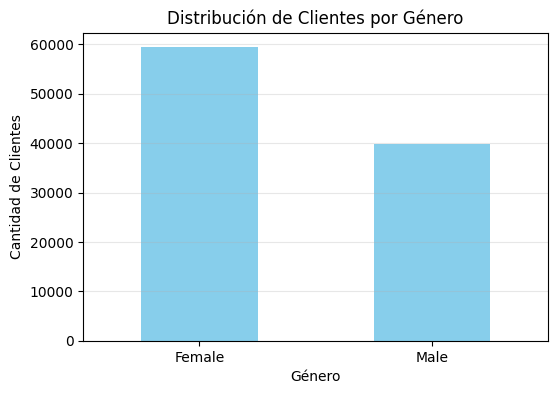

In [ ]:
import matplotlib.pyplot as plt

# Conteo por género
conteo_genero = df_from_csv['gender'].value_counts()

plt.figure(figsize=(6,4))
conteo_genero.plot(kind='bar', color='skyblue')
plt.title('Distribución de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


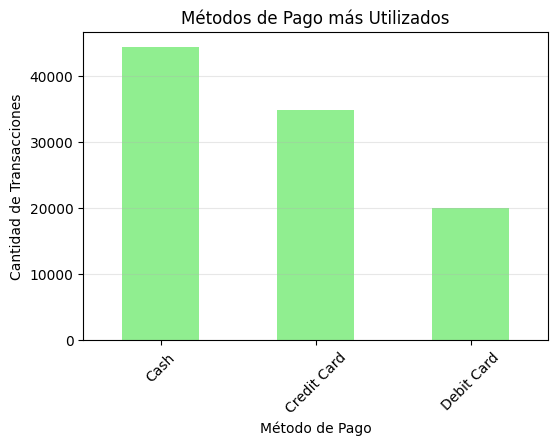

In [ ]:

# Métodos de pago más utilizados
metodos_pago = df_from_csv['payment_method'].value_counts()

plt.figure(figsize=(6,4))
metodos_pago.plot(kind='bar', color='lightgreen')
plt.title('Métodos de Pago más Utilizados')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


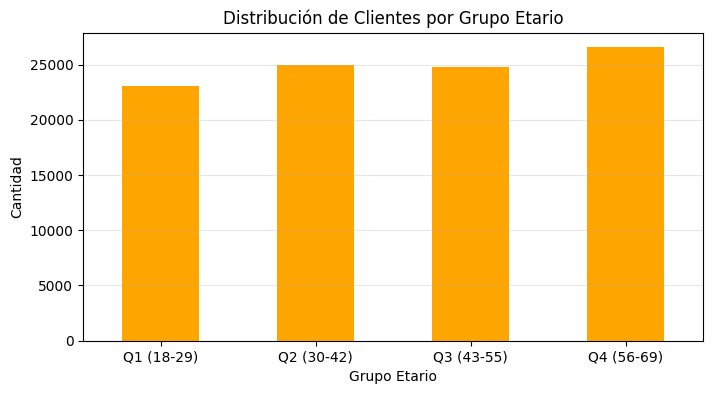

In [ ]:

# Conteo por grupo etario
conteo_edades = df_from_csv['age_group'].value_counts().sort_index()

plt.figure(figsize=(8,4))
conteo_edades.plot(kind='bar', color='orange')
plt.title('Distribución de Clientes por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


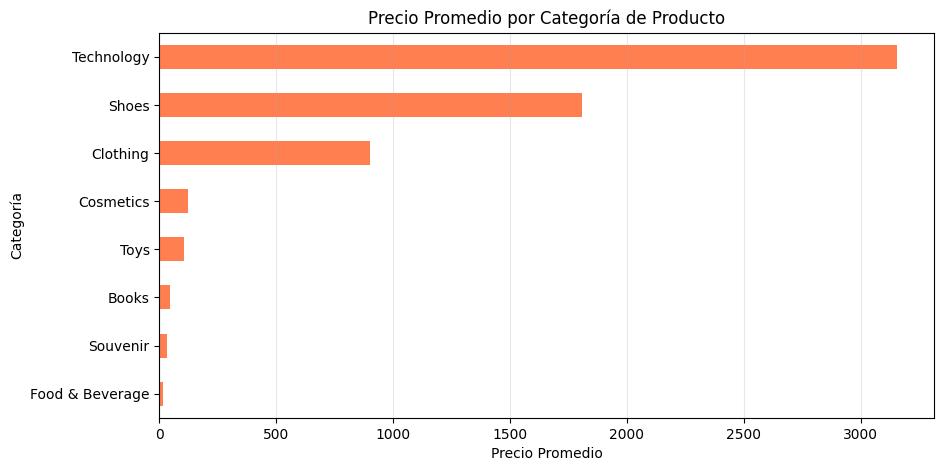

In [ ]:

# Análisis de precios por categoría
precios_por_categoria = df_from_csv.groupby('category')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
precios_por_categoria.plot(kind='barh', color='coral')
plt.title('Precio Promedio por Categoría de Producto')
plt.xlabel('Precio Promedio')
plt.ylabel('Categoría')
plt.grid(axis='x', alpha=0.3)
plt.show()


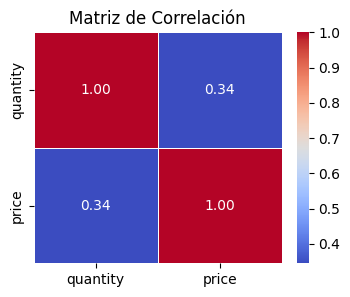

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación simple
corr = df_from_csv[['quantity','price']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


## Conclusiones


A lo largo de este trabajo práctico se abordó de manera estructurada el **proceso ETL (Extracción, Transformación y Limpieza)** de un conjunto de datos compuesto por información de ventas y clientes.

### Resumen del proceso:

- **Extracción:**  
  - Se cargaron correctamente los archivos CSV `customer_data.csv` y `sales_data.csv`.  
  - Se exploró la estructura inicial de los DataFrames para identificar posibles problemas de calidad de datos.

- **Transformación:**  
  - Se limpiaron valores nulos y se estandarizaron formatos de fecha.  
  - Se unieron los DataFrames por `id_cliente`.  
  - Se realizaron categorizaciones por método de pago, género y grupo etario.  
  - Se identificaron patrones de consumo en métodos de pago y rangos de edad.

- **Limpieza y Carga:**  
  - Se construyó un DataFrame limpio y estructurado, sin duplicados ni inconsistencias.  
  - Se garantizó la integridad de los datos antes de la carga.

- **Carga en Base de Datos y SQL:**  
  - Se exportaron los datos a SQLite3 utilizando SQLAlchemy.  
  - Se ejecutaron consultas SQL equivalentes a las transformaciones, validando la consistencia de la información.

- **Análisis Exploratorio (EDA):**  
  - Se exploraron distribuciones por género, edad y métodos de pago.  
  - Se identificaron las categorías de productos con precios más altos y los patrones de compra más frecuentes.

---

### 🧠 Principales hallazgos:

- Se detectó un **método de pago predominante**, lo que puede orientar estrategias de medios de cobro.  
- El grupo etario de **25 a 35 años** presenta una alta concentración de compras, siendo un segmento clave para campañas de marketing.    
- Las **categorías con precios más elevados** representan oportunidades para estrategias comerciales diferenciadas.
- No hay una correlacion significante entre la cantidad de productos y el precio pagado.


---

### Conclusión Final:

El uso de herramientas como **Pandas** para ETL, **SQLAlchemy** para la persistencia y **Matplotlib** para análisis exploratorio permite implementar un **flujo de trabajo profesional y replicable**.  
Este enfoque es aplicable a múltiples escenarios reales en Ciencia de Datos y Business Intelligence, optimizando la toma de decisiones basadas en datos.


---

## Bibliografía

- ISPC – Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial  
- [Pandas Documentation](https://pandas.pydata.org/docs/)  
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)  
- [NumPy Documentation](https://numpy.org/doc/)  
- [Seaborn Documentation](https://seaborn.pydata.org/)  
- [SQLAlchemy Documentation](https://docs.sqlalchemy.org/)  
- [Kaggle Datasets](https://www.kaggle.com/datasets/dataceo/sales-and-customer-data?resource=download)

---